In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./car_details_v4.csv')

In [3]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [4]:
cols = ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel_type','Transmission', 'Location', 'Color',
       'Owner', 'Seller_type', 'Engine', 'Max_power', 'Max_torque', 'Drivetrain','Length', 'Width', 'Height',
       'Seating_capacity', 'Fuel_tank_capacity']

In [5]:
df.columns = cols

In [6]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel_type,Transmission,Location,Color,Owner,Seller_type,Engine,Max_power,Max_torque,Drivetrain,Length,Width,Height,Seating_capacity,Fuel_tank_capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [7]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.00,825000.0,1925000.0,35000000.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.00,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.00,50000.0,72000.0,2000000.0
Length,1995.0,4.280861e+03,4.424585e+02,3099.0,3985.00,4370.0,4629.0,5569.0
Width,1995.0,1.767992e+03,1.352658e+02,1475.0,1695.00,1770.0,1831.5,2220.0
Height,1995.0,1.591735e+03,1.360740e+02,1165.0,1485.00,1545.0,1675.0,1995.0
Seating_capacity,1995.0,5.306266e+00,8.221701e-01,2.0,5.00,5.0,5.0,8.0
Fuel_tank_capacity,1946.0,5.200221e+01,1.511020e+01,15.0,41.25,50.0,60.0,105.0


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Make,2059,33,Maruti Suzuki,440
Model,2059,1050,X1 sDrive20d xLine,15
Fuel_type,2059,9,Diesel,1049
Transmission,2059,2,Manual,1133
Location,2059,77,Mumbai,342
Color,2059,17,White,802
Owner,2059,6,First,1619
Seller_type,2059,3,Individual,1997
Engine,1979,108,1197 cc,231
Max_power,1979,335,89 bhp @ 4000 rpm,90


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel_type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller_type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max_power           1979 non-null   object 
 13  Max_torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [10]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel_type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller_type             0
Engine                 80
Max_power              80
Max_torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating_capacity       64
Fuel_tank_capacity    113
dtype: int64

In [11]:
def fill_na(dataf, fill_val_def):
    
    ''' Fills the missing values (NAs) or the null values by the
    mean, median or mode of the respective feature
    
    Arguments:
    dataf --> the dataframe 
    fill_val_def --> variable defining the way to fill the NA values
    
    returns the filled dataframe with no null values
    
    '''
    
    num_cols = len(dataf.columns)
    for col in range(num_cols):
        if dataf.iloc[:,col].isnull().sum() > 0:
            if fill_val_def == 'median':
                fill_val = dataf.iloc[:,col].median()
            elif fill_val_def == 'mode':
                fill_val = dataf.iloc[:,col].mode()[0]
            elif fill_val_def == 'mean':
                fill_val = dataf.iloc[:,col].mean()
                
            dataf.iloc[:,col].fillna(fill_val, inplace=True)
            
    return dataf

In [12]:
df = fill_na(df, 'mode')

In [13]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel_type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller_type           0
Engine                0
Max_power             0
Max_torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating_capacity      0
Fuel_tank_capacity    0
dtype: int64

In [14]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel_type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller_type', 'Engine',
       'Max_power', 'Max_torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating_capacity', 'Fuel_tank_capacity'],
      dtype='object')

# Levels of measurements

# Make: nominal, Model: nominal, Price: ratio, Year: interval, Kilometer: ratio, Fuel_type: nominal, Transmission: nominal, Location: nominal, Color: nominal, Owner: ordinal, Seller_type: nominal, Engine: ratio, Max_power: ratio,
# Max_torque: ratio, Drivetrain: nominal, Length: ratio, Width: ratio, Height: ratio, Seating_capacity: interval,
# Fuel_tank_capacity: ratio

In [15]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD'], dtype=object)

In [16]:
# Convert the Max_torque and Max_power features to numeric features 
Engine_f = [int(val.split()[0]) for val in list(df['Engine'])]
df['Engine_f'] = Engine_f
Engine_hp = [float(re.split(r' |@',val)[0]) for val in list(df['Max_power'])]
df['Engine_hp'] = Engine_hp

In [17]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel_type,Transmission,Location,Color,Owner,...,Max_power,Max_torque,Drivetrain,Length,Width,Height,Seating_capacity,Fuel_tank_capacity,Engine_f,Engine_hp
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,1198,87.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,1248,74.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1197,79.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,1197,82.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,2393,148.0


In [18]:
corr = df.corr()

<AxesSubplot:>

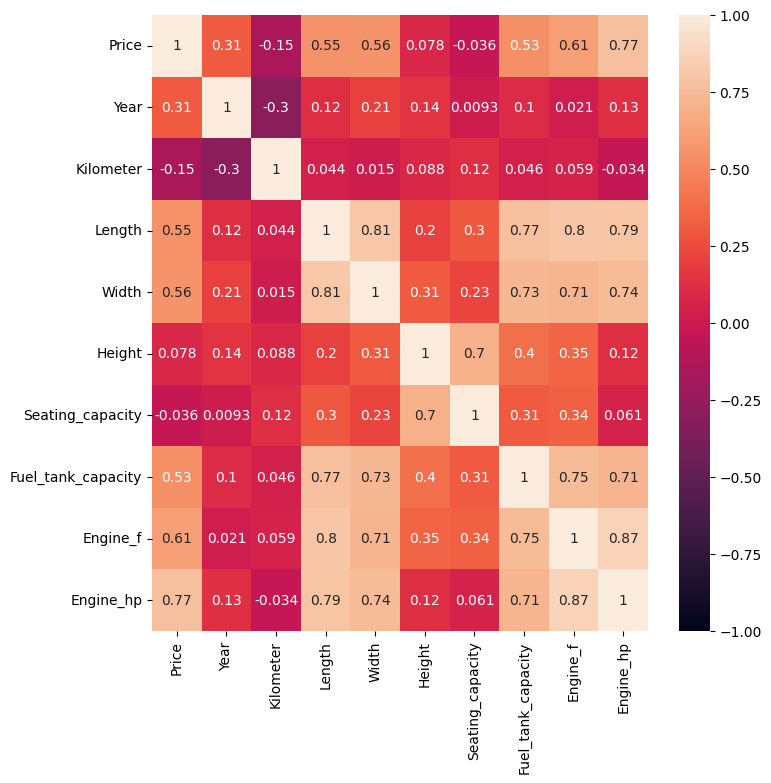

In [19]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

In [20]:
# log transform the Prices (target for prediction) so that it follows a normal distribution
Y_lin = df['Price'].copy()
Y_log = np.log(Y_lin)

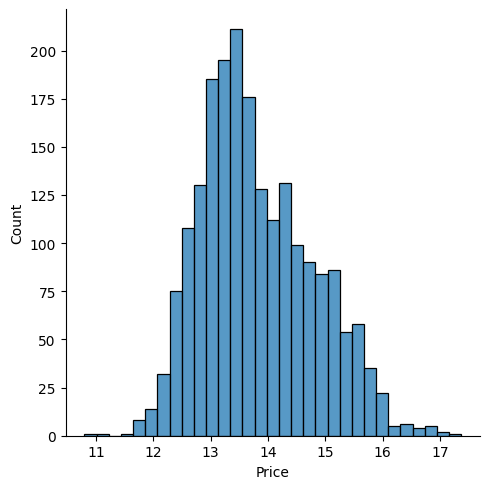

In [21]:
sns.displot(Y_log)

In [22]:
X = df.drop(columns=['Engine', 'Price', 'Max_power', 'Max_torque'])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_log, random_state=1324)

In [25]:
X_train.columns

Index(['Make', 'Model', 'Year', 'Kilometer', 'Fuel_type', 'Transmission',
       'Location', 'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating_capacity', 'Fuel_tank_capacity', 'Engine_f',
       'Engine_hp'],
      dtype='object')

In [26]:
# Encode categorical variables 

In [27]:
from category_encoders import *
from sklearn.preprocessing import LabelEncoder

In [28]:
def encode_categorical_features(X_categ_train, X_categ_test, y_train, encoder, Target_based=False):
    
    ''' Encodes the categorical features with the desired encoder
    
    Arguments:
    X_categ_train --> categorical features from the training set
    X_categ_test --> categorical features from the test set
    y_train --> target from the training set
    encoder --> the desired encoder to encode the features
    
    Target_based --> boolean argument indicating whether the encoder is target based (default is false)
    
    Returns encoded features
    
    '''
    
    if Target_based:
        X_encoded_train = encoder.fit_transform(X_categ_train,y_train)
        X_encoded_test = encoder.transform(X_categ_test)
    else:
        X_encoded_train = encoder.fit_transform(X_categ_train)
        X_encoded_test = encoder.transform(X_categ_test)
    
    return X_encoded_train, X_encoded_test

In [29]:
owner_enc_map = {'UnRegistered Car':0,'First':1, 'Second':2,'Third':3, 'Fourth':4, '4 or More':5}
seating_cpty_map = {'2.0':0,'4.0':1,'5.0':2,'6.0':3,'7.0':4,'8.0':5}
drivetrain_map = {'FWD':0, 'RWD':1, 'AWD':2}
transmisson_map = {'Manual':0, 'Automatic':1}

In [30]:
X_train['Year'] = X_train['Year'].apply(int)
X_test['Year'] = X_test['Year'].apply(int)
X_train['Seating_capacity'] = X_train['Seating_capacity'].apply(str)
X_test['Seating_capacity'] = X_test['Seating_capacity'].apply(str)

In [31]:
enc_target = TargetEncoder(cols=['Make','Location','Color','Seller_type','Fuel_type'], min_samples_leaf=30, smoothing=20) # Target based
enc_ohe = OneHotEncoder() # Not Target based
enc_sum = SumEncoder() #Target based
enc_catboost = CatBoostEncoder(cols=['Model'], sigma=10.0, a=5) #Target based
enc_label = LabelEncoder() # Not Target based
enc_ordinal = OrdinalEncoder(cols=['Owner','Seating_capacity', 'Transmission','Drivetrain'], mapping=[{'col':'Owner', 'mapping':owner_enc_map},{'col':'Seating_capacity'
                                                                                                                   , 'mapping': seating_cpty_map}, {'col':'Drivetrain', 'mapping':drivetrain_map},
                                                                                                            {'col':'Transmission', 'mapping':transmisson_map}]) # Not Target based

enc_count = CountEncoder(cols=['Model'],handle_unknown=1)
enc_target1 = TargetEncoder(cols=['Model'],min_samples_leaf=20, smoothing=1000 )
enc_hash = HashingEncoder(cols=['Model'])

In [32]:
X_train_tr1, X_test_tr1 = encode_categorical_features(X_train, X_test,y_train,enc_target, Target_based=True)

In [33]:
X_train_tr, X_test_tr = encode_categorical_features(X_train_tr1, X_test_tr1,y_train,enc_ordinal)

In [34]:
X_train_tr = X_train_tr.drop(columns=['Model'])
X_test_tr = X_test_tr.drop(columns=['Model'])

In [35]:
# start building models

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import QuantileRegressor, Lasso, Ridge, RANSACRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
import statsmodels.api as sm

In [37]:
scale = StandardScaler()
scale1 = MinMaxScaler()

In [38]:
def predict_model_performance(fitted_model,X_train,X_test,y_train,y_test,performance_measure):
    
    ''' Calculates various metrics for model perfromance measurements
    
    Arguments:
    
    fitted_model --> a fitted model 
    X_train --> training features
    X_test --> test features
    y_train --> training target
    y_test --> test target
    performance_measure --> desired performance metrics (a list of metrics)
    
    prints the performance metrics with respect to the training set and the test set
    
    '''
    
    y_pred = fitted_model.predict(X_test)
    y_train_pred = fitted_model.predict(X_train)
    
    for score in performance_measure:
        perfromance_test = score(y_test,y_pred)
        perfromance_train = score(y_train,y_train_pred)
        
        diff_metric = abs(perfromance_train - perfromance_test)
        rel_diff_metric = diff_metric/abs(perfromance_train)
        percent_diff = rel_diff_metric*100.0
        
        print('The testing "{}" of the model is {}'.format(score.__name__,perfromance_test))
        print('The training "{}" of the model is {}'.format(score.__name__,perfromance_train))
        print('The percentage difference between train and test {} is {:.4}%'.format(score.__name__, percent_diff))
        

In [39]:
def compute_rel_percent_diff(metric_train, metric_test):
    
    ''' Computes relative percentage difference between the training and test perfromance score of a model
    
    Arguments:
    metric_train --> training score
    metric_test --> test score
    
    returns percentage difference of these scores
    
    '''
    
    diff_metric = abs(metric_train - metric_test)
    rel_diff_metric = diff_metric/abs(metric_train)
    percent_diff = rel_diff_metric*100.0
    
    return percent_diff

In [40]:
from sklearn.model_selection import learning_curve

In [41]:
def plot_learning_curve(model, X_train, y_train, cv, metric, train_sizes):
    
    ''' Plots the learning curve as a function of training size
    
    Arguments:
    
    model --> a model instance
    X_train --> training observations
    y_train --> training target
    cv --> cross validation method (initger or a defined process)
    metric --> performance metric to measure the learning 
    train_sizes --> sizes of the training set 
        
    '''
    
    train_size_abs, train_scores, test_scores = learning_curve(model,X_train,y_train,cv=cv
                                                               ,scoring=metric,train_sizes=train_sizes)
    
    metric_name = metric.split('_')[0]
    
    metric_name_join = ' '.join(metric.split('_')[1:]).title()
    if metric_name == 'neg':
        train_scores_avg = (train_scores.mean(axis=1))*(-1)
        test_scores_avg = (test_scores.mean(axis=1))*(-1)
    
    fig,ax=plt.subplots()
    ax.plot(train_size_abs, train_scores_avg, marker="o",color="red")
    ax.set_xlabel("Training set size")
    ax.set_ylabel(metric_name_join)
    ax.plot(train_size_abs, test_scores_avg , marker="o", color="green")
    ax.legend(["Training" , "Validation"])
    plt.show()

In [42]:
train_sizes = [0.1, 0.2, 0.3, 0.5, 0.6,0.7,0.8,0.85,0.9,0.95,1.0]

In [43]:
# Build OLS model with statsmodel to understand if the linear regression works well
import statsmodels.api as sm

In [44]:
X_train_tr_scl = scale1.fit_transform(X_train_tr)

In [45]:
X_test_tr_scl = scale1.transform(X_test_tr)

In [46]:
X_train_tr_scl = sm.add_constant(X_train_tr_scl)

In [47]:
model1 = sm.OLS(y_train, X_train_tr_scl)

In [48]:
results1 = model1.fit()

In [49]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     916.2
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:57:23   Log-Likelihood:                -312.89
No. Observations:                1544   AIC:                             661.8
Df Residuals:                    1526   BIC:                             757.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4328      0.096     98.677      0.0

In [50]:
X_train_tr.columns

Index(['Make', 'Year', 'Kilometer', 'Fuel_type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length', 'Width',
       'Height', 'Seating_capacity', 'Fuel_tank_capacity', 'Engine_f',
       'Engine_hp'],
      dtype='object')

In [51]:
X_train_filter1 = X_train_tr.drop(columns=['Engine_f','Fuel_tank_capacity','Seating_capacity','Width'])

In [52]:
X_test_filter1 = X_test_tr.drop(columns=['Engine_f','Fuel_tank_capacity','Seating_capacity','Width'])

In [53]:
X_train_tr_scl1 = scale1.fit_transform(X_train_filter1)

In [54]:
X_test_tr_scl1 = scale1.transform(X_test_filter1)

In [55]:
X_train_tr_scl1 = sm.add_constant(X_train_tr_scl1)

In [56]:
model2 = sm.OLS(y_train, X_train_tr_scl1)

In [57]:
results2 = model2.fit()

In [58]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1181.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:58:09   Log-Likelihood:                -324.61
No. Observations:                1544   AIC:                             677.2
Df Residuals:                    1530   BIC:                             752.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3860      0.095     98.941      0.0

In [59]:
X_train_filter1.columns

Index(['Make', 'Year', 'Kilometer', 'Fuel_type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length', 'Height',
       'Engine_hp'],
      dtype='object')

In [60]:
X_train_filter2 = X_train_filter1.drop(columns=['Height'])

In [61]:
X_test_filter2 = X_test_filter1.drop(columns=['Height'])

In [62]:
X_train_tr_scl2 = scale1.fit_transform(X_train_filter2)

In [63]:
X_test_tr_scl2 = scale1.transform(X_test_filter2)

In [64]:
X_train_tr_scl2 = sm.add_constant(X_train_tr_scl2)

In [65]:
model3 = sm.OLS(y_train, X_train_tr_scl2)

In [66]:
results3 = model3.fit()

In [67]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:58:35   Log-Likelihood:                -325.09
No. Observations:                1544   AIC:                             676.2
Df Residuals:                    1531   BIC:                             745.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3966      0.094     99.712      0.0

In [68]:
X_train_filter2.columns

Index(['Make', 'Year', 'Kilometer', 'Fuel_type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller_type', 'Drivetrain', 'Length', 'Engine_hp'],
      dtype='object')

In [69]:
X_train_filter3 = X_train_filter2.drop(columns=['Color','Seller_type','Fuel_type', 'Kilometer'])

In [70]:
X_test_filter3 = X_test_filter2.drop(columns=['Color','Seller_type','Fuel_type', 'Kilometer'])

In [88]:
X_train_tr_scl3 = scale1.fit_transform(X_train_filter3)

In [72]:
X_test_tr_scl3 = scale1.transform(X_test_filter3)

In [73]:
X_train_tr_scl3 = sm.add_constant(X_train_tr_scl3)

In [74]:
model4 = sm.OLS(y_train, X_train_tr_scl3)

In [75]:
results4 = model4.fit()

In [76]:
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1785.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:59:01   Log-Likelihood:                -377.85
No. Observations:                1544   AIC:                             773.7
Df Residuals:                    1535   BIC:                             821.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2966      0.087    106.639      0.0

In [77]:
X_train_filter3.columns

Index(['Make', 'Year', 'Transmission', 'Location', 'Owner', 'Drivetrain',
       'Length', 'Engine_hp'],
      dtype='object')

In [78]:
# Perform residual diagnostics for linear regression assumptions

In [79]:
from scipy import stats

((array([-3.32078159, -3.06469936, -2.92235802, ...,  2.92235802,
          3.06469936,  3.32078159]),
  array([-1.28956744, -1.25694542, -1.21068705, ...,  1.81321968,
          1.89574005,  2.33110511])),
 (0.29565669232092, -1.6372894882219678e-14, 0.9548133751513039))

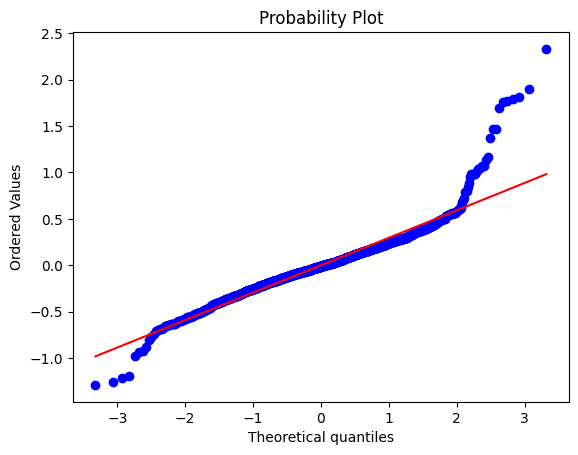

In [80]:
stats.probplot(results4.resid,plot=plt)

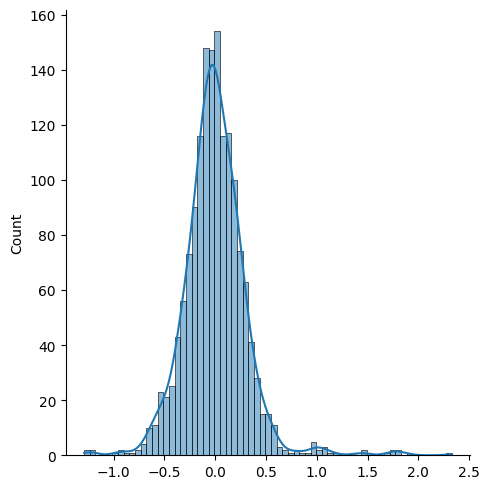

In [81]:
sns.displot(results4.resid,kde=True)

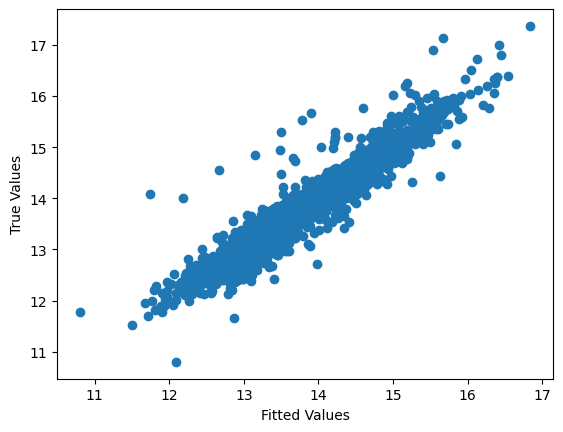

In [83]:
ax = plt.axes()
ax.scatter(results4.fittedvalues, y_train)
ax.set_ylabel('True Values')
ax.set_xlabel('Fitted Values')

plt.show()

eval_env: 1


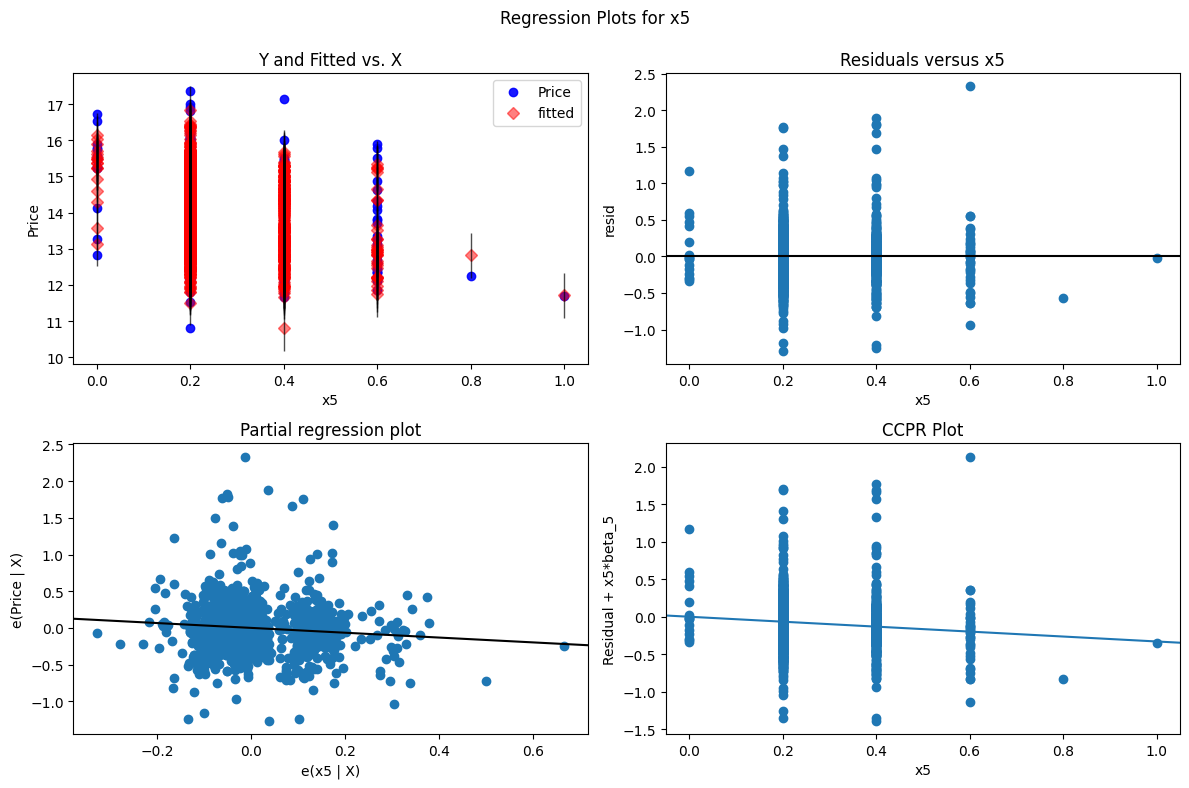

In [86]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(results4, 'x5', fig=fig)
plt.show()

In [114]:
################################################################################################################

In [87]:
# Build linear regression model with sklearn LinearRegression
lin_reg = LinearRegression()

In [89]:
cross_validation_linreg = cross_validate(lin_reg, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [90]:
cross_validation_linreg.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_r2', 'train_r2', 'test_neg_mean_absolute_error', 'train_neg_mean_absolute_error'])

In [91]:
np.mean(cross_validation_linreg['test_r2'])

0.9002798790706071

In [92]:
np.mean(cross_validation_linreg['train_r2'])

0.9030174807973348

In [93]:
print(cross_validation_linreg['test_neg_mean_absolute_error'].mean())

-0.2166325235565229


In [94]:
print(cross_validation_linreg['train_neg_mean_absolute_error'].mean())

-0.21537495979986598


In [95]:
# Perform a independent t-test to confirm whether the means of the cross validated scores of training 
# and validation sets of different splits are similar or different. The test will confirm if the train and validation
# scores are same. This will further confirm presence of overfitting or underfitting.
# null hypothesis: the means of the two indpendent samples are same
# alternative hypothesis: the means are different 

from statsmodels.stats.weightstats import ttest_ind

In [96]:
tstat, p_val, df = ttest_ind(cross_validation_linreg['test_neg_mean_absolute_error'],cross_validation_linreg['train_neg_mean_absolute_error'])
if p_val > 0.05:
    print("The means of the train and test cross validated scores are similar")
    print("p-value:", p_val)
else:
    print("The means of the train and test cross validated scores are significantly different")
    print("p-value:", p_val)

The means of the train and test cross validated scores are similar
p-value: 0.786950502056702


In [97]:
rel_diff = compute_rel_percent_diff(np.mean(cross_validation_linreg['train_neg_mean_absolute_error']),
                                    np.mean(cross_validation_linreg['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 0.5839%


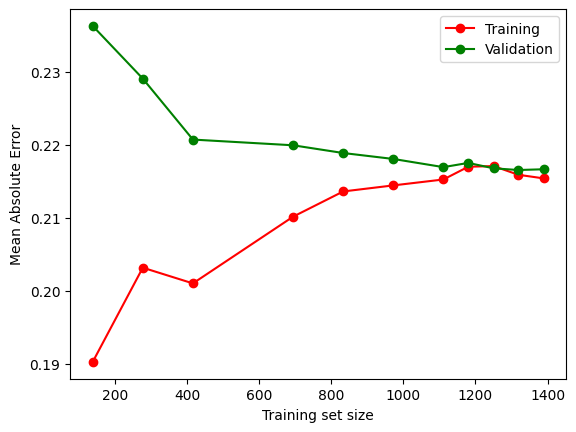

In [98]:
plot_learning_curve(lin_reg, X_train_tr_scl3, y_train, 10, 'neg_mean_absolute_error', train_sizes)

In [99]:
lin_reg.fit(X_train_tr_scl3, y_train)

LinearRegression()

In [100]:
y_pred = lin_reg.predict(X_test_tr_scl3)

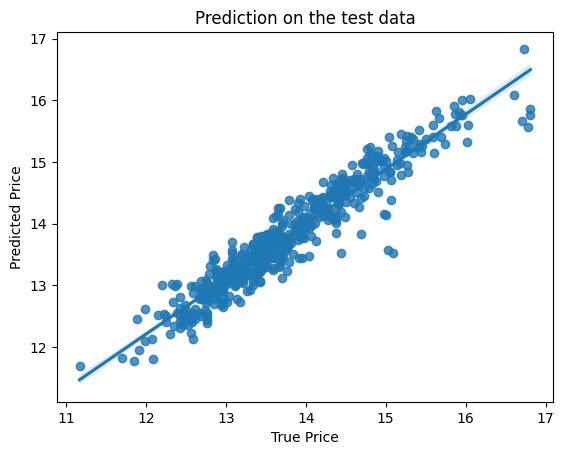

In [103]:
ax = sns.regplot(x=y_test,y=y_pred)
ax.set(xlabel='True Price',
       ylabel='Predicted Price',
       title='Prediction on the test data'
      )
plt.show()

In [104]:
predict_model_performance(lin_reg,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9098526744319774
The training "r2_score" of the model is 0.9029378453333149
The percentage difference between train and test r2_score is 0.7658%
The testing "mean_absolute_error" of the model is 0.20628184095121707
The training "mean_absolute_error" of the model is 0.2153624279983757
The percentage difference between train and test mean_absolute_error is 4.216%


In [113]:
##############################################################################################################

In [105]:
# Build RANSAC Regression model
ransac_reg = RANSACRegressor()  

In [106]:
cross_validation_ransac = cross_validate(ransac_reg, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [107]:
np.mean(cross_validation_ransac['test_r2'])

0.8925436705548255

In [108]:
np.mean(cross_validation_ransac['train_r2'])

0.8935260428953031

In [109]:
np.mean(cross_validation_ransac['test_neg_mean_absolute_error'])

-0.22200986503774792

In [110]:
np.mean(cross_validation_ransac['train_neg_mean_absolute_error'])

-0.22134974876795574

In [111]:
rel_diff = compute_rel_percent_diff(np.mean(cross_validation_ransac['train_neg_mean_absolute_error']),
                                    np.mean(cross_validation_ransac['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 0.2982%


In [112]:
#Perform t-test to see the similarity of the cross validated scores

tstat, p_val, df = ttest_ind(cross_validation_ransac['test_neg_mean_absolute_error'],cross_validation_ransac['train_neg_mean_absolute_error'])
if p_val > 0.05:
    print("The means of the train and test cross validated scores are similar")
    print("p-value:", p_val)
else:
    print("The means of the train and test cross validated scores are significantly different")
    print("p-value:", p_val)

The means of the train and test cross validated scores are similar
p-value: 0.8768182736472995


In [115]:
###############################################################################################################

In [116]:
# Build a lasso base model
lasso = LassoCV()

In [117]:
cross_validation_lasso = cross_validate(lasso, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [118]:
np.mean(cross_validation_lasso['test_r2'])

0.9002517467463577

In [119]:
np.mean(cross_validation_lasso['train_r2'])

0.902986267366604

In [120]:
np.mean(cross_validation_lasso['test_neg_mean_absolute_error'])

-0.2167968966641653

In [121]:
np.mean(cross_validation_lasso['train_neg_mean_absolute_error'])

-0.21554405883378017

In [122]:
#Perform t-test to see the similarity of the cross validated scores

tstat, p_val, df = ttest_ind(cross_validation_lasso['test_neg_mean_absolute_error'],cross_validation_lasso['train_neg_mean_absolute_error'])
if p_val > 0.05:
    print("The means of the train and test cross validated scores are similar")
    print("p-value:", p_val)
else:
    print("The means of the train and test cross validated scores are significantly different")
    print("p-value:", p_val)

The means of the train and test cross validated scores are similar
p-value: 0.787177420648275


In [128]:
rel_diff = compute_rel_percent_diff(np.mean(cross_validation_lasso['train_neg_mean_absolute_error']),
                                    np.mean(cross_validation_lasso['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 0.5812%


In [125]:
lasso.fit(X_train_tr_scl3,y_train)

LassoCV()

In [126]:
lasso.alpha_

0.0003289723711803048

In [127]:
predict_model_performance(lasso,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9094316449230647
The training "r2_score" of the model is 0.902906674783969
The percentage difference between train and test r2_score is 0.7227%
The testing "mean_absolute_error" of the model is 0.20623122667690533
The training "mean_absolute_error" of the model is 0.2155238298691924
The percentage difference between train and test mean_absolute_error is 4.312%


In [148]:
#################################################################################################################

In [133]:
# Optimize Lasso regularization parameter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold

In [130]:
lasso_reg = Lasso(random_state=1234)

In [131]:
params = {'alpha': [0.01,0.02, 0.05, 0.1, 0.5, 0.8, 1, 5, 10, 15]}

In [135]:
rscv_lasso = RandomizedSearchCV(estimator=lasso_reg,param_distributions=params, cv=10, 
                          scoring=['r2','neg_mean_absolute_error'],n_jobs=-1,
                         refit='neg_mean_absolute_error',return_train_score=True,
                          random_state=1234)

In [136]:
rscv_lasso.fit(X_train_tr_scl3, y_train)

RandomizedSearchCV(cv=10, estimator=Lasso(random_state=1234), n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5,
                                                  0.8, 1, 5, 10, 15]},
                   random_state=1234, refit='neg_mean_absolute_error',
                   return_train_score=True,
                   scoring=['r2', 'neg_mean_absolute_error'])

In [137]:
rscv_lasso.best_params_

{'alpha': 0.01}

In [138]:
(rscv_lasso.cv_results_['mean_test_r2'])

array([ 0.8739944 ,  0.83080382,  0.63884489,  0.55681144, -0.00419756,
       -0.00419756, -0.00419756, -0.00419756, -0.00419756, -0.00419756])

In [139]:
np.mean(rscv_lasso.cv_results_['mean_train_r2'])

0.29128696988778635

In [140]:
predict_model_performance(rscv_lasso,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.8685382858194274
The training "r2_score" of the model is 0.8772821590807603
The percentage difference between train and test r2_score is 0.9967%
The testing "mean_absolute_error" of the model is 0.2389350272296229
The training "mean_absolute_error" of the model is 0.2490469238621321
The percentage difference between train and test mean_absolute_error is 4.06%


In [141]:
gscv_lasso = GridSearchCV(estimator=lasso_reg, param_grid=params, scoring=['r2','neg_mean_absolute_error'], 
                    return_train_score=True, n_jobs=-1, refit='neg_mean_absolute_error',cv=5)

In [142]:
gscv_lasso.fit(X_train_tr_scl3, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=1234), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 0.8, 1, 5, 10,
                                   15]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['r2', 'neg_mean_absolute_error'])

In [144]:
gscv_lasso.best_params_

{'alpha': 0.01}

In [146]:
np.mean(gscv_lasso.cv_results_['mean_test_r2'])

0.28867631769401403

In [147]:
#################################################################################################################

In [149]:
# Build Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf = RandomForestRegressor(random_state=1234)

In [151]:
cross_validation_rf = cross_validate(rf, X_train_tr_scl3, y_train, scoring=['r2','neg_mean_absolute_error'], cv=10,
                                 n_jobs=-1,return_train_score=True, return_estimator=True)

In [152]:
np.mean(cross_validation_rf['test_r2'])

0.953194406532311

In [153]:
np.mean(cross_validation_rf['train_r2'])

0.993012208895163

In [155]:
np.mean(cross_validation_rf['test_neg_mean_absolute_error'])

-0.14399070297446884

In [156]:
np.mean(cross_validation_rf['train_neg_mean_absolute_error'])

-0.05584077032125936

In [157]:
rel_diff = compute_rel_percent_diff(np.mean(cross_validation_rf['train_neg_mean_absolute_error']),
                                    np.mean(cross_validation_rf['test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 157.9%


In [158]:
#Perform t-test to see the similarity of the cross validated scores

tstat, p_val, df = ttest_ind(cross_validation_rf['test_neg_mean_absolute_error'],cross_validation_rf['train_neg_mean_absolute_error'])
if p_val > 0.05:
    print("The means of the train and test cross validated scores are similar")
    print("p-value:", p_val)
else:
    print("The means of the train and test cross validated scores are significantly different")
    print("p-value:", p_val)

The means of the train and test cross validated scores are significantly different
p-value: 4.478310839430076e-14


In [159]:
rf.fit(X_train_tr_scl3,y_train)

RandomForestRegressor(random_state=1234)

In [160]:
predict_model_performance(rf,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9119225479620429
The training "r2_score" of the model is 0.9932100235265404
The percentage difference between train and test r2_score is 8.184%
The testing "mean_absolute_error" of the model is 0.1566651757241422
The training "mean_absolute_error" of the model is 0.0548844589885665
The percentage difference between train and test mean_absolute_error is 185.4%


In [161]:
# Optimize random forest hyperparameters

In [162]:
param_range_lr = [1.0, 0.5, 0.1, 0.01]
param_range_fc = np.arange(1,61)
param_n_estimators = np.arange(5, 225, 5)

In [163]:
grid_rf = [{'n_estimators': param_n_estimators, 'criterion': ['squared_error', 'absolute_error'],
            'max_depth': param_range_fc, 'min_samples_split': param_range_fc[1:],
            'min_samples_leaf': param_range_fc, 'max_features':['sqrt', 'log2']}]

In [164]:
rf = RandomForestRegressor(random_state=1234)

In [165]:
rscv_rf = RandomizedSearchCV(estimator=rf,param_distributions= grid_rf, cv=5, 
                          scoring=['r2','neg_mean_absolute_error'],n_jobs=-1,
                         refit='neg_mean_absolute_error',return_train_score=True,
                          random_state=1234)

In [167]:
rscv_rf.fit(X_train_tr_scl3, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1234),
                   n_jobs=-1,
                   param_distributions=[{'criterion': ['squared_error',
                                                       'absolute_error'],
                                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60]),
                                         'max...
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60]),
                                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220])}],
                   random_state=1234, refit='neg_mean_absolute_error',
                   return_train_score=True,
                   scoring=['r2', 'neg_mean_absolute_error'])

In [169]:
rscv_rf.best_params_

{'n_estimators': 190,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'absolute_error'}

In [170]:
np.mean(rscv_rf.cv_results_['mean_test_r2'])

0.8765984580868572

In [171]:
np.mean(rscv_rf.cv_results_['mean_train_r2'])

0.8889836563080072

In [172]:
np.mean(rscv_rf.cv_results_['mean_test_neg_mean_absolute_error'])

-0.23748488632595

In [173]:
np.mean(rscv_rf.cv_results_['mean_train_neg_mean_absolute_error'])

-0.22424327712050296

In [174]:
rel_diff = compute_rel_percent_diff(np.mean(rscv_rf.cv_results_['mean_train_neg_mean_absolute_error']),
                                    np.mean(rscv_rf.cv_results_['mean_test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 5.905%


In [175]:
#Perform t-test to see the similarity of the cross validated scores

tstat, p_val, df = ttest_ind(rscv_rf.cv_results_['mean_test_neg_mean_absolute_error'],rscv_rf.cv_results_['mean_train_neg_mean_absolute_error'])
if p_val > 0.05:
    print("The means of the train and test cross validated scores are similar")
    print("p-value:", p_val)
else:
    print("The means of the train and test cross validated scores are significantly different")
    print("p-value:", p_val)

The means of the train and test cross validated scores are similar
p-value: 0.346008693849405


In [176]:
predict_model_performance(rscv_rf,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.8877035827578552
The training "r2_score" of the model is 0.9238881564646428
The percentage difference between train and test r2_score is 3.917%
The testing "mean_absolute_error" of the model is 0.19286056454398284
The training "mean_absolute_error" of the model is 0.17656285578503236
The percentage difference between train and test mean_absolute_error is 9.231%


In [177]:
# Fine tune the random forest parameters with gridsearch

In [181]:
param_fine_estimators = [170, 175, 180, 185, 190, 195, 200, 205, 210]
param_samples_split = [8,10,12,14,16,20,22]
param_samples_leaf = [7,9,12,13, 15,18]
param_max_depth = [9, 12,13,14, 15,17,20,23]

In [179]:
cv_method = RepeatedKFold(n_splits=10, 
                                    n_repeats=10, 
                                    random_state=1234)

In [180]:
rf_up = RandomForestRegressor(max_features='log2', criterion='absolute_error',random_state=1234)

In [182]:
param_grid1 = [{'n_estimators': param_fine_estimators, 
            'max_depth': param_max_depth, 'min_samples_split': param_samples_split,
            'min_samples_leaf': param_samples_leaf}]

In [183]:
gscv = GridSearchCV(estimator=rf_up, param_grid=param_grid1, scoring=['r2','neg_mean_absolute_error'], 
                    return_train_score=True, n_jobs=-1, refit='neg_mean_absolute_error',cv=5)

In [184]:
gscv.fit(X_train_tr_scl3,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             max_features='log2',
                                             random_state=1234),
             n_jobs=-1,
             param_grid=[{'max_depth': [9, 12, 13, 14, 15, 17, 20, 23],
                          'min_samples_leaf': [7, 9, 12, 13, 15, 18],
                          'min_samples_split': [8, 10, 12, 14, 16, 20, 22],
                          'n_estimators': [170, 175, 180, 185, 190, 195, 200,
                                           205, 210]}],
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['r2', 'neg_mean_absolute_error'])

In [185]:
np.mean(gscv.cv_results_['mean_test_r2'])

0.9063156212795876

In [186]:
np.mean(gscv.cv_results_['mean_train_r2'])

0.9207581441146167

In [187]:
np.mean(gscv.cv_results_['mean_train_neg_mean_absolute_error'])

-0.18142447788974275

In [188]:
np.mean(gscv.cv_results_['mean_test_neg_mean_absolute_error'])

-0.2011535535350439

In [189]:
rel_diff = compute_rel_percent_diff(np.mean(gscv.cv_results_['mean_train_neg_mean_absolute_error']),
                                    np.mean(gscv.cv_results_['mean_test_neg_mean_absolute_error']))
print('The percentage difference of train and test score is: {:.4}%'.format(rel_diff))

The percentage difference of train and test score is: 10.87%


In [191]:
#Perform t-test to see the similarity of the cross validated scores

tstat, p_val, df = ttest_ind(gscv.cv_results_['mean_test_neg_mean_absolute_error'],gscv.cv_results_['mean_train_neg_mean_absolute_error'])
if p_val > 0.05:
    print("The means of the train and test cross validated scores are similar")
    print("p-value:", p_val)
else:
    print("The means of the train and test cross validated scores are significantly different")
    print("p-value:", p_val)


The means of the train and test cross validated scores are significantly different
p-value: 0.0


In [190]:
predict_model_performance(gscv,X_train_tr_scl3,X_test_tr_scl3,y_train,y_test,[r2_score,mean_absolute_error])

The testing "r2_score" of the model is 0.9019263631338968
The training "r2_score" of the model is 0.9436655754695429
The percentage difference between train and test r2_score is 4.423%
The testing "mean_absolute_error" of the model is 0.177423549652457
The training "mean_absolute_error" of the model is 0.15147576722372014
The percentage difference between train and test mean_absolute_error is 17.13%
